# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

debt,0,1,sum,percent_of_debt_per_children
children,,,,
0,13028.0,1063.0,14091.0,7.543822
1,4364.0,444.0,4808.0,9.234609
2,1858.0,194.0,2052.0,9.454191
3,303.0,27.0,330.0,8.181818
4,37.0,4.0,41.0,9.756098
5,9.0,0.0,9.0,0.000000


<AxesSubplot:xlabel='children', ylabel='percent_of_debt_per_children'>

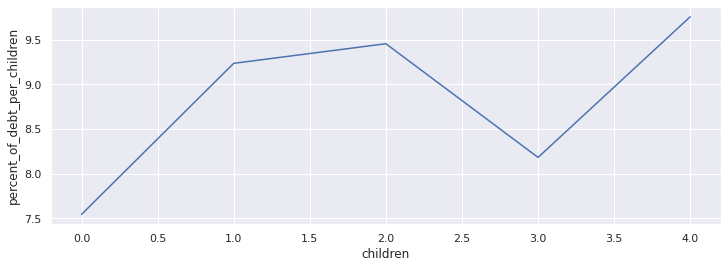

In [22]:
import seaborn as sn
sn.set(rc={"figure.figsize":(12, 4)})

children_vs_debt_data = data.groupby(["children","debt"])["debt"].count().unstack(level="debt").fillna(0)
children_vs_debt_data["sum"] = children_vs_debt_data[1]+children_vs_debt_data[0]
children_vs_debt_data["percent_of_debt_per_children"] = children_vs_debt_data[1]/children_vs_debt_data["sum"]*100

display(children_vs_debt_data)
sn.lineplot(data=children_vs_debt_data[:5],x="children",y="percent_of_debt_per_children")

Вывод: При построении результатов зависимости между количеством детей и процентом возврата кредита в срок, стоит уточнить, что в связи с недостаточным количеством данных по кейсам с пятью детьми, эти данные будут вычеркнуты из графика и анализа. 

По  графику можно увидеть, что линейной связи между количеством детей и процентом возврата кредита в срок - **не наблюдается**. Разница между лучшей и худшей статистикой возврата, составляет не больше 2.21 процента.

В данной группе, лучшее значение выплат было у группы без детей с 7.54% процентом просрочки, а худший результат у группы с 4 детьми с 9.75%

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

debt,0,1,sum,percent_of_debt_per_family_status
family_status,,,,
Не женат / не замужем,2523,273,2796,9.763948
в разводе,1105,84,1189,7.064760
вдовец / вдова,888,63,951,6.624606
гражданский брак,3749,385,4134,9.313014
женат / замужем,11334,927,12261,7.560558


Средний процент невозврата: 8.065377275052759


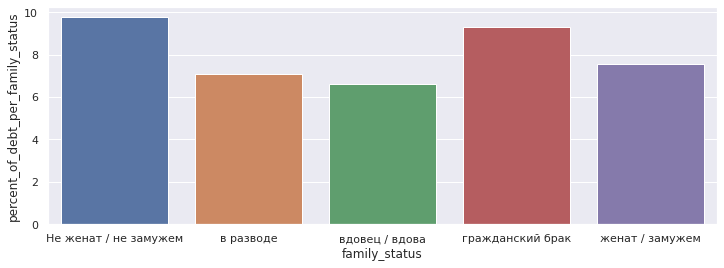

In [23]:
family_status_vs_debt_data = data.groupby(["family_status","debt"])["debt"].count().unstack(level="debt")
family_status_vs_debt_data["sum"] = family_status_vs_debt_data[1]+family_status_vs_debt_data[0]
family_status_vs_debt_data["percent_of_debt_per_family_status"] = family_status_vs_debt_data[1]/family_status_vs_debt_data["sum"]*100

display(family_status_vs_debt_data)
sn.barplot(x=family_status_vs_debt_data.index, y= family_status_vs_debt_data["percent_of_debt_per_family_status"])
print("Средний процент невозврата:",family_status_vs_debt_data["percent_of_debt_per_family_status"].mean())

Вывод: Для анализа зависимости семейного статуса на возврат кредита в срок, так же использовался процент невозврата для проведения анализа. Данные показывают, что связь между семейным положением и возвратом кредите в срок - **отсутствует**. Не выделяется ни одна группа из всех отличающемся результатом от среднего значения во всем группам. Самое большое отличие от среднего значение присутствует у группы "Не женат/не замужем" с результатом в 1.7%  

В данной группе, лучшее значение выплат было у группы "вдовец / вдова" с 6.62% процентом просрочки, а худший результат у группы "Не женат / не замужем" с 9.76%

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

debt,0,1,sum,percent_of_debt_per_total_income_category
total_income_category,,,,
A,23,2,25,8.000000
B,4660,354,5014,7.060231
C,14568,1353,15921,8.498210
D,328,21,349,6.017192
E,20,2,22,9.090909


<AxesSubplot:xlabel='total_income_category', ylabel='percent_of_debt_per_total_income_category'>

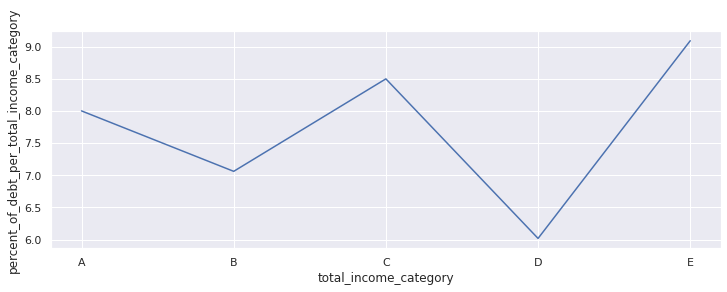

In [24]:
total_income_category_vs_debt_data = data.groupby(["total_income_category","debt"])["debt"].count().unstack(level="debt")
total_income_category_vs_debt_data["sum"] = total_income_category_vs_debt_data[1]+total_income_category_vs_debt_data[0]
total_income_category_vs_debt_data["percent_of_debt_per_total_income_category"] = total_income_category_vs_debt_data[1]/total_income_category_vs_debt_data["sum"]*100

display(total_income_category_vs_debt_data)
sn.lineplot(x=total_income_category_vs_debt_data.index, y= total_income_category_vs_debt_data["percent_of_debt_per_total_income_category"])

Вывод: при анализе влияния зависимости между уровнем дохода и возвратом кредита в срок, линейной зависимости - **не наблюдается**.  Однако, стоит заметить, что количество данных для проведения полноценного анализа не достаточно, так как группы "А" и "Е" оба имеет менее 30 кейсов, тогда как группа "С" более 15000. В связи с этим, результат анализа может отличаться от реальности. 

В данной группе, лучшее значение выплат было у группы "D" с 6.02% процентом просрочки, а худший результат у группы "E" с 9.09%

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

debt,0,1,sum,percent_of_debt_per_purpose_category
purpose_category,,,,
операции с автомобилем,3879,400,4279,9.347978
операции с недвижимостью,9971,780,10751,7.255139
получение образования,3619,369,3988,9.252758
проведение свадьбы,2130,183,2313,7.911803


Средний процент невозврата: 8.441919671185735


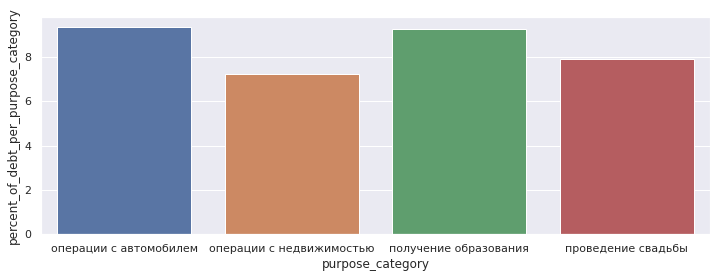

In [25]:
purpose_category_vs_debt_data = data.groupby(["purpose_category","debt"])["debt"].count().unstack(level="debt").fillna(0)
purpose_category_vs_debt_data["sum"] = purpose_category_vs_debt_data[1]+purpose_category_vs_debt_data[0]
purpose_category_vs_debt_data["percent_of_debt_per_purpose_category"] = purpose_category_vs_debt_data[1]/purpose_category_vs_debt_data["sum"]*100

display(purpose_category_vs_debt_data)
sn.barplot(x=purpose_category_vs_debt_data.index, y= purpose_category_vs_debt_data["percent_of_debt_per_purpose_category"])
print("Средний процент невозврата:",purpose_category_vs_debt_data["percent_of_debt_per_purpose_category"].mean())

Вывод: в анализе влияния цели кредита на процент возврата кредита в срок - **связь не была обнаружена**. Процент каждой категории отличался от среднего значения от всех групп не более чем на один процент.

В данной группе, лучшее значение выплат было у группы "операции с недвижимостью" с 7.26% процентом просрочки, а худший результат у группы "операции с автомобилем	" с 9.35%

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

In [26]:
extra_data = pd.read_csv('/datasets/data.csv')

display(extra_data[extra_data["total_income"].isna()].head(20))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Ответ: никакой взаимосвязи между пропусками и другими данными не было обнаружено. Однако, можно заметить что, где отсутствуют данные о кол-во днях, там же отсутствует информация о заработке. Поэтому, вряд ли это незнание или нехотение человека вписывать информацию, а скорее техническая ошибка, так как полная взаимосвязь.

Однако, если "total_income" высчитывается из "days_employed", тогда пропуски можно сослать на незаполнения полей в связи с незнанием и отказом в предоставлении информации. 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ: значение медианы защищает от аномальных значений и лучше среднего показывает возможный пропущенный результат, так как вероятно пропуска быть больше или меньше медианы ровна.* 

### Шаг 4: общий вывод.

В результате анализа, явных взаимосвязей между спектром групп и процентом возврата кредита в срок - не было выявлено. Для некоторых групп отсутствовало достаточное количество кейсов, для остальных, разница между группами и среднем значением не превышала значение, которое бы показывала прямое влияние данного фактора на процент по не возврату кредита в срок. 

Так же, стоит отметить, что можно создать группу людей которые статистические имеют больший риск в невыплате кредита в срок. При объедении худших локальных результатов, например, не замужняя женщина с 4 детьми, зарплатной категорией "С", которая желает взять кредит для операций с автомобилем, более вероятно просрочит кредит чем люди с другими характеристиками. 
